# Screen Latency Demo

### Setup

In [1]:
import aopy
import os
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from datetime import date
from bmi3d.db import dbfunctions as db

blocks = [2621, 2622, 2623] #Block IDs to test
data_dir = "/data/raw" # Directory of raw data to load
pulses2avg = [2,10,10] # Number of pulses to average to calculate latency for each block. 

### Load data and calculate latency for each block

Files in data_dir:  {'hdf': 'hdf/test20210827_11_te2621.hdf', 'ecube': 'ecube/2021-08-27_BMI3D_te2621'}
Sync latency estimate: 0.0231 s


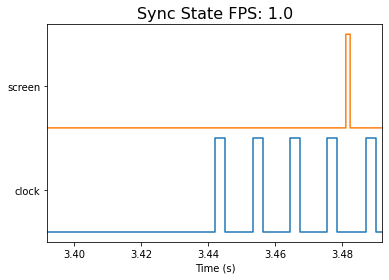

Block: 2621  Average Latency  38.2 ms


Files in data_dir:  {'hdf': 'hdf/test20210827_12_te2622.hdf', 'ecube': 'ecube/2021-08-27_BMI3D_te2622'}
Sync latency estimate: 0.0047 s


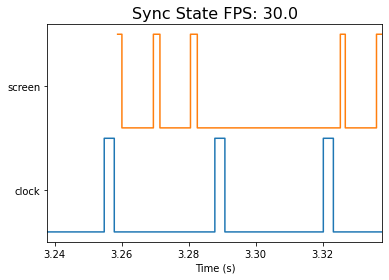

Block: 2622  Average Latency  32.256 ms


Files in data_dir:  {'hdf': 'hdf/test20210827_13_te2623.hdf', 'ecube': 'ecube/2021-08-27_BMI3D_te2623'}
Sync latency estimate: 0.0256 s


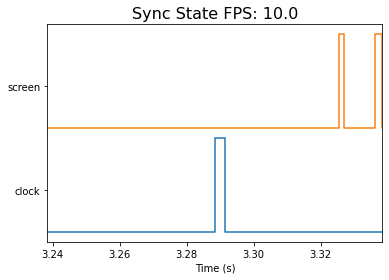

Block: 2623  Average Latency  34.012 ms




In [4]:
for iblock, blockid in enumerate(blocks):
    files = aopy.data.get_filenames_in_dir(data_dir, blockid)
    print('Files in data_dir: ', files)
    data, metadata = aopy.preproc.parse_bmi3d(data_dir, files)

    # Clock timing
    clock_onsets = data['sync_clock']['timestamp']
    clock_timestamps, clock_values = aopy.preproc.get_edges_from_onsets(clock_onsets, 0.003)
    
    # Screen timing    
    screen_values = data['measure_clock_offline']['value']
    screen_timestamps = data['measure_clock_offline']['timestamp']
    
    # Prepare data for plotting
    events = [clock_values, screen_values]
    timestamps = [clock_timestamps, screen_timestamps]
    labels= ['clock', 'screen']
    
    # Plot clock timing and screen timing
    pulse_time_start = clock_onsets[2]
    aopy.visualization.plot_events_time(events, timestamps, labels)
    plt.title('Sync State FPS: '+str(metadata['sync_state_fps']), fontsize=16)
    plt.xlim((pulse_time_start-0.05, pulse_time_start+.05))
    plt.show()
    
    # Calculate latency
    latency = np.empty(pulses2avg[iblock])
    latency[:] = np.nan
    
    for ipulse in range(pulses2avg[iblock]):
        clock_time = clock_onsets[ipulse*2]
        screen_time,_ = aopy.preproc.get_closest_value(clock_time, screen_timestamps[screen_timestamps>clock_time], radius=1)
        latency[ipulse] = screen_time - clock_time
        
    
    print('Block:', blockid, ' Average Latency ', np.round(1000*np.nanmean(latency),5), 'ms')
    
    print('\n')